
<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Optimización de funciones escalares diferenciables con `SymPy` </font> </center>




<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Extrema_example_es.svg/1200px-Extrema_example_es.svg.png" width="300px" height="100px" />

> - Mediante optimización se obtienen soluciones elegantes tanto en teoría como en ciertas aplicaciones. 
> - La teoría de optimización usa elementos comenzando con cálculo elemental y álgebra lineal básica, y luego se extiende con análisis funcional y convexo.
> - Las aplicaciones en optimización involucran ciencia, ingeniería, economía, finanzas e industria.
> - El amplio y creciente uso de la optimización lo hace escencial para estudiantes y profesionales de cualquier rama de la ciencia y la tecnología.

**Referencia:**
- http://www.math.uwaterloo.ca/~hwolkowi//henry/reports/talks.d/t06talks.d/06msribirs.d/optimportance.shtml

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/OpenStreetMap_routing_service.png/300px-OpenStreetMap_routing_service.png" width="300px" height="100px" />

Algunas aplicaciones son:

1. Ingeniería
 - Encontrar la composición de equilibrio de una mezcla de diferentes átomos.
 - Planeación de ruta para un robot (o vehículo aéreo no tripulado).
 - Planeación de la mano de obra óptima en una construcción o planta de producción.
2. Distribución óptima de recursos.
 - Distribución de rutas de vuelo.
 - Encontrar una dieta óptima.
 - Planeación de ruta óptima.
3. Optimización financiera
 - Administración de riesgos.
 - Portafolios de inversión.

En esta clase veremos aspectos básicos de optimización. En específico, veremos cómo obtener máximos y mínimos de una función escalar de una variable (como en cálculo diferencial).

___
## 0. Librerías que usaremos

Como ya dijimos en la primer clase `python` es el lenguaje de programación (el cual es de alto nivel). Sin embargo, `python` solo tiene unos pocos comandos primitivos y para hacer más fácil su uso en nuestras actividades de simulación en ingeniería, otras personas ya han escrito ciertas librerías por nosotros.

### 0.1 `NumPy`

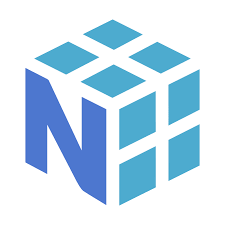

`NumPy` (Numerical Python) es la librería fundamental para computación científica (numérica) con `Python`. Contiene, entre otras cosas:
- un objeto tipo arreglo N-dimensional muy poderoso
- funciones sofisticadas
- funciones de álgebra lineal, transformada de Fourier y números aleatorios.

Por lo anterior, `NumPy` es de amplio uso entre la comunidad científica e ingenieril (por su manejo de cantidades vectoriales). De la misma manera, se usa para guardar datos. Para nuestros propósitos, se puede usar libremente.

**Referencia:**
- http://www.numpy.org/

`NumPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [1]:
# importar la librería numpy
import numpy as np

In [2]:
a=np.array([1,2,3,4,5])
a

array([1, 2, 3, 4, 5])

In [3]:
a.shape

(5,)

In [4]:
a.min()

1

### 0.2 `SymPy`

<img style="float: right; margin: 0px 0px 15px 15px;" src="http://www.sympy.org/static/images/logo.png" width="300px" height="100px" />

`SymPy` (Symbolic Python) es una librería de `Python` para matemáticas simbólicas. Su objetivo es convertirse en un sistema de álgebra computacional con las mejores características, manteniendo el código lo más simple posible para que sea comprensible.

**Referencia:**
- http://www.sympy.org/en/index.html

`SymPy` ya viene incluido en la instalación estándar de Anaconda por defecto. Para comenzar a usarlo, solo debemos de importarlo:

In [5]:
# importar la librería sympy
import sympy as sym

In [6]:
sym.init_printing(use_latex='mathjax')

$$y=f(x)=x^2$$

La funcionalidad de imprimir en formato LaTex que nos da `SymPy` mediante el proyecto `mathjax` hace de `SymPy` una herramienta muy atractiva...

Notar que en `SymPy` y en `NumPy` existen funciones con el mismo nombre, pero reciben tipos de datos diferentes...

In [7]:
a

array([1, 2, 3, 4, 5])

In [8]:
np.sin(a)

array([ 0.84147098,  0.90929743,  0.14112001, -0.7568025 , -0.95892427])

In [9]:
help(sym.sin)

Help on class sin in module sympy.functions.elementary.trigonometric:

class sin(TrigonometricFunction)
 |  sin(arg)
 |  
 |  The sine function.
 |  
 |  Returns the sine of x (measured in radians).
 |  
 |  Explanation
 |  ===========
 |  
 |  This function will evaluate automatically in the
 |  case x/pi is some rational number [4]_.  For example,
 |  if x is a multiple of pi, pi/2, pi/3, pi/4 and pi/6.
 |  
 |  Examples
 |  ========
 |  
 |  >>> from sympy import sin, pi
 |  >>> from sympy.abc import x
 |  >>> sin(x**2).diff(x)
 |  2*x*cos(x**2)
 |  >>> sin(1).diff(x)
 |  0
 |  >>> sin(pi)
 |  0
 |  >>> sin(pi/2)
 |  1
 |  >>> sin(pi/6)
 |  1/2
 |  >>> sin(pi/12)
 |  -sqrt(2)/4 + sqrt(6)/4
 |  
 |  
 |  See Also
 |  ========
 |  
 |  csc, cos, sec, tan, cot
 |  asin, acsc, acos, asec, atan, acot, atan2
 |  
 |  References
 |  ==========
 |  
 |  .. [1] https://en.wikipedia.org/wiki/Trigonometric_functions
 |  .. [2] http://dlmf.nist.gov/4.14
 |  .. [3] http://functions.wolfram.com/E

In [10]:
sym.sin(a)

AttributeError: 'ImmutableDenseNDimArray' object has no attribute 'could_extract_minus_sign'

In [11]:
sym.sin(3.1416)

-7.34641020664359e-6

In [12]:
np.sin(3.1416)

-7.346410206643587e-06

In [13]:
# from sympy import *
# from numpy import *
# Esta práctica no es para nada recomendable.

In [14]:
#import sympy as sym

### 0.3 `PyPlot` de `matplotlib`

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://matplotlib.org/_static/logo2.svg" width="300px" height="100px" />

El módulo `PyPlot` de la librería `matplotlib` contiene funciones que nos permite generar una gran cantidad de gráficas rápidamente. Las funciones de este módulo están escritas con el mismo nombre que las funciones para graficar en `Matlab`.

**Referencia:**
- https://matplotlib.org/api/pyplot_summary.html

In [15]:
# importar matplotlib.pyplot
import matplotlib.pyplot as plt
# Lo siguiente es equivalente
# from matplotlib import pyplot as plt
# comando para que las gráficas salgan en la misma ventana
%matplotlib inline

Ya que revisamos todas las librerías que usaremos, empecemos con la clase como tal...

___
Basamos todos los resultados en los siguientes teoremas:

## 1. Teorema de Fermat (análisis)

Si una función $f(x)$ alcanza un máximo o mínimo local en $x=c$, y si la derivada $f'(c)$ existe en el punto $c$, entonces $f'(c) = 0$.

### Ejemplo

Sabemos que la función $f(x)=x^2$ tiene un mínimo global en $x=0$, pues

$$f(x)=x^2\geq0,\qquad\text{y}\qquad f(x)=x^2=0 \qquad\text{si y solo si}\qquad x=0.$$

In [16]:
# declarar la variable real x
sym.var('x')

x

In [17]:
# declarar ahora f=x^2 y mostrar
f = x**2
f

 2
x 

In [18]:
# derivar f respecto a x y mostrar
df = sym.diff(f,x)
df

2⋅x

In [19]:
# resolver f'(x)=0 y mostrar soluciones
soluciones = sym.solve(df,x)
soluciones

[0]

In [20]:
help(sym.solve)

Help on function solve in module sympy.solvers.solvers:

solve(f, *symbols, **flags)
    Algebraically solves equations and systems of equations.
    
    Explanation
    
    Currently supported:
        - polynomial
        - transcendental
        - piecewise combinations of the above
        - systems of linear and polynomial equations
        - systems containing relational expressions
    
    Examples
    
    The output varies according to the input and can be seen by example:
    
        >>> from sympy import solve, Poly, Eq, Function, exp
        >>> from sympy.abc import x, y, z, a, b
        >>> f = Function('f')
    
    Boolean or univariate Relational:
    
        >>> solve(x < 3)
        (-oo < x) & (x < 3)
    
    
    To always get a list of solution mappings, use flag dict=True:
    
        >>> solve(x - 3, dict=True)
        [{x: 3}]
        >>> sol = solve([x - 3, y - 1], dict=True)
        >>> sol
        [{x: 3, y: 1}]
        >>> sol[0][x]
        3
        

In [21]:
# Encuentra también soluciones complejas
s2 = sym.solve(x**2+1,x)
s2

[-ⅈ, ⅈ]

In [22]:
s2[0]

-ⅈ

In [23]:
s2[1]

ⅈ

In [24]:
# Puedo resolver ecuaciones que involucren más de una variable
sym.var('y')
s3 = sym.solve(x**3 + y,x)
s3

⎡          3 ____        3 ____    3 ____        3 ____⎤
⎢3 ____    ╲╱ -y    √3⋅ⅈ⋅╲╱ -y     ╲╱ -y    √3⋅ⅈ⋅╲╱ -y ⎥
⎢╲╱ -y , - ────── - ───────────, - ────── + ───────────⎥
⎣            2           2           2           2     ⎦

Veamos la gráfica...

In [25]:
f

 2
x 

In [26]:
df

2⋅x

In [27]:
soluciones

[0]

In [28]:
f

 2
x 

In [29]:
# convertir f e una función que se pueda evaluar numéricamente (función lambdify de la librería sympy)
f_num = sym.lambdify(x,f,modules='numpy')


In [30]:
f_num(2)

4

In [31]:
f_num(np.array([12,5,13]))

array([144,  25, 169], dtype=int32)

In [32]:
# Coordenadas x (abscisas)
x_num = np.linspace(-5,5)
x_num

array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])

In [33]:
x_num.shape

(50,)

In [34]:
f_num(x_num)

array([2.50000000e+01, 2.30008330e+01, 2.10849646e+01, 1.92523948e+01,
       1.75031237e+01, 1.58371512e+01, 1.42544773e+01, 1.27551020e+01,
       1.13390254e+01, 1.00062474e+01, 8.75676801e+00, 7.59058726e+00,
       6.50770512e+00, 5.50812162e+00, 4.59183673e+00, 3.75885048e+00,
       3.00916285e+00, 2.34277384e+00, 1.75968347e+00, 1.25989171e+00,
       8.43398584e-01, 5.10204082e-01, 2.60308205e-01, 9.37109538e-02,
       1.04123282e-02, 1.04123282e-02, 9.37109538e-02, 2.60308205e-01,
       5.10204082e-01, 8.43398584e-01, 1.25989171e+00, 1.75968347e+00,
       2.34277384e+00, 3.00916285e+00, 3.75885048e+00, 4.59183673e+00,
       5.50812162e+00, 6.50770512e+00, 7.59058726e+00, 8.75676801e+00,
       1.00062474e+01, 1.13390254e+01, 1.27551020e+01, 1.42544773e+01,
       1.58371512e+01, 1.75031237e+01, 1.92523948e+01, 2.10849646e+01,
       2.30008330e+01, 2.50000000e+01])

In [35]:
soluciones

[0]

In [36]:
soluciones[0]

0

In [37]:
f_num(soluciones[0])

0

$x^2$

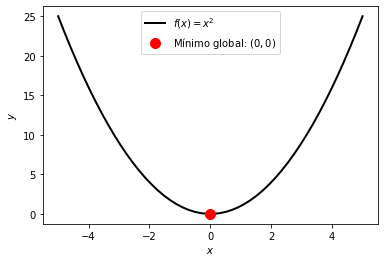

In [38]:
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, #puntos en x
         f_num(x_num), #puntos en y
         'k', #color=negro
         lw=2, #grosor de la línea
         label = '$f(x)=x^2$'#etiqueta de la gráfica
        )

#Graficando el punto mínimo
plt.plot(soluciones, #coordenada en x
        f_num(soluciones[0]), #coordenada en y
        'ro', #punto rojo
        ms=10, #grosor del punto
        label='Mínimo global: $(0,0)$'#etiqueta de la gráfica
        )
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.show()

Ver diferencias entre f y f_num

In [39]:
f

 2
x 

In [40]:
f_num(np.array([1,2,3]))

array([1, 4, 9], dtype=int32)

**Otra manera de hacer lo anterior**

Concepto de función...

In [41]:
# Concepto de función
# def nombre_de_la_funcion(argumento[s]):
#     --> Operación 1
#     --> Operación 2
#     --> ...
#     --> Operación N
#     return [lo que vaya a devolver]


$$h(x)=x^2$$

In [42]:
def h(x):
    return x**2

In [43]:
sym.var('x')

x

In [44]:
dh = sym.diff(h(x),x)
dh

2⋅x

In [45]:
soluciones = sym.solve(dh,x)
soluciones

[0]

In [46]:
h(x)

 2
x 

In [47]:
h(2)

4

In [48]:
h(np.array([1,2,3]))

array([1, 4, 9], dtype=int32)

In [49]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

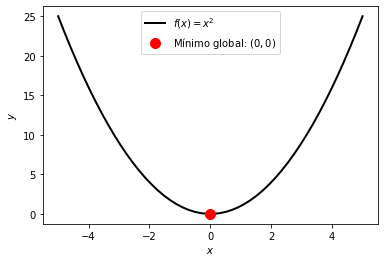

In [50]:
#Graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, #puntos en x
         h(x_num), #puntos en y
         'k', #color=negro
         lw=2, #grosor de la línea
         label = '$f(x)=x^2$'#etiqueta de la gráfica
        )

#Graficando el punto mínimo
plt.plot(soluciones, #coordenada en x
        h(soluciones[0]), #coordenada en y
        'ro', #punto rojo
        ms=10, #grosor del punto
        label='Mínimo global: $(0,0)$'#etiqueta de la gráfica
        )
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.show()

El converso del teorema anterior no es cierto.

### Actividad
Considere $g(z)=z^3$. 
- Usando `sympy`, muestre que $g'(0)=0$.
- Sin embargo, descartar que $z=0$ es un extremo de $g(z)$ viendo su **gráfica**.

1. Declarar la variable simbólica

2. Crear la función g(z)

3. Derivar la función

4. Resolver la derivada de la función cuando dg = 0 (sym.solve)

5. Graficar la función y el punto óptimo

In [51]:
# Declarar la variable simbolica z
sym.var('z')

z

In [52]:
# Definimos funcion g(z)
def g(z):
    return z**3


In [53]:
# Derivamos g(z)
dg = sym.diff(g(z),z)
dg

   2
3⋅z 

In [54]:
# Puntos criticos (sy.solve(dg,x))
soluciones = sym.solve(dg,z)
soluciones

[0]

In [55]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [56]:
# graficar
x_num = np.linspace(-10,10, num=100)
x_num

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

In [57]:
x_num.shape

(100,)

In [58]:
g(x_num)

array([-1.00000000e+03, -9.40610059e+02, -8.83619379e+02, -8.28978490e+02,
       -7.76637923e+02, -7.26548208e+02, -6.78659877e+02, -6.32923460e+02,
       -5.89289487e+02, -5.47708490e+02, -5.08130999e+02, -4.70507545e+02,
       -4.34788658e+02, -4.00924870e+02, -3.68866710e+02, -3.38564710e+02,
       -3.09969401e+02, -2.83031313e+02, -2.57700977e+02, -2.33928923e+02,
       -2.11665682e+02, -1.90861786e+02, -1.71467764e+02, -1.53434148e+02,
       -1.36711467e+02, -1.21250254e+02, -1.07001038e+02, -9.39143501e+01,
       -8.19407214e+01, -7.10306823e+01, -6.11347636e+01, -5.22034960e+01,
       -4.41874103e+01, -3.70370370e+01, -3.07029070e+01, -2.51355510e+01,
       -2.02854996e+01, -1.61032836e+01, -1.25394337e+01, -9.54448062e+00,
       -7.06895503e+00, -5.06338768e+00, -3.47830926e+00, -2.26425050e+00,
       -1.37174211e+00, -7.51314801e-01, -3.53499282e-01, -1.28826269e-01,
       -2.78264741e-02, -1.03061015e-03,  1.03061015e-03,  2.78264741e-02,
        1.28826269e-01,  

Text(0, 0.5, '$y$')

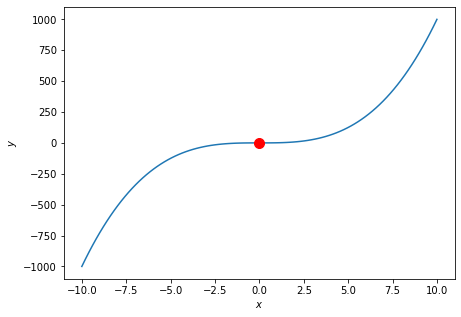

In [59]:
plt.figure(figsize=(7,5))
plt.plot(x_num, g(x_num), label='$g(z)=z^3$')
plt.plot(soluciones,g(soluciones[0]), 'ro', ms=10, label='Mínimo global $(0,0)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

## 2. Criterio de la segunda derivada

Sea $f(x)$ una función tal que $f’(c)=0$ y cuya segunda derivada existe en un intervalo abierto que contiene a $c$.
- Si $f’’(c)>0$, entonces $f(c)$ es un mínimo relativo.
- Si $f’’(c)<0$, entonces $f(c)$ es un máximo relativo.
- Si $f’’(c)=0$, entonces el criterio no decide. 

### Ejemplo

Mostrar, usando `sympy`, que la función $f(x)=x^2$ tiene un mínimo relativo en $x=0$.

Ya vimos que $f'(0)=0$. Notemos que:

In [60]:
sym.var('x')

x

In [61]:
f=x**2

In [62]:
f

 2
x 

In [63]:
# Sacamos la segunda derivada
df = sym.diff(f,x)
df

2⋅x

In [65]:
#Punto crítico 2x=0
soluciones = sym.solve(df,x)
soluciones

[0]

In [64]:
d2f = sym.diff(df,x)
d2f

2

In [66]:
k = 2*x
k

2⋅x

In [67]:
k.subs({x:0})

0

In [68]:
d2f.subs({x:soluciones[0]})

2

In [ ]:
# Formas equivalentes de obtener la segunda derivada

# Formas
#d2f = sym.diff(f,x,x)
#d2f = sym.diff(f,x,2)

In [69]:
sym.diff(f,x,x)

2

In [70]:
sym.diff(f,x,2)

2

Por tanto, por el criterio de la segunda derivada, $f(0)=0$ es un mínimo relativo (en efecto, el mínimo global).

### Ejemplo
¿Qué pasa con $g(z)=z^3$ al intentar utilizar el criterio de la segunda derivada? (usar `sympy`).

In [71]:
sym.var('z')

z

In [72]:
# Definimos la función g(z)=z^3
def g(z):
    return z**3

In [73]:
g(z)

 3
z 

In [74]:
# Sacamos la derivada de la función g respecto a z g'(z)=3z^2
dg = sym.diff(g(z),z)
dg

   2
3⋅z 

In [75]:
#3z^2 = 0
soluciones = sym.solve(dg,z)
soluciones

[0]

In [78]:
soluciones[0]

0

In [76]:
# Observamos que g'(0)=0 (es un punto crítico)
g(0)

0

In [77]:
# Obtenemos la segunda derivada de la función g respecto a x g''(x)=6x
d2g = sym.diff(dg,z)
d2g

6⋅z

In [79]:
# Evaluamos g''(0)
d2g.subs({z:soluciones[0]})

0

Como $g''(0)=0$ entonces el criterio de la segunda derivada no concluye.

### Actividad

¿Qué pasa con $h(x)=x^4$ al intentar utilizar el criterio de la segunda derivada?.

In [80]:
# 1.- definir la variable simbólica
sym.var('x')

x

In [81]:
# 2.- Definir la función
def h(x):
    return x**4

In [82]:
h(x)

 4
x 

In [83]:
# 3.- Derivar la función
dh = sym.diff(h(x),x)
dh

   3
4⋅x 

In [84]:
# 4.- Encontrar los puntos críticos
sol = sym.solve(dh,x)
sol

[0]

In [85]:
# 5.- Probar el criterio de la segunda derivada para ver
#     si el pto crítico es mínimo o máximo relativo
d2h = sym.diff(dh,x)
d2h


    2
12⋅x 

In [86]:
d2h.subs({x:sol[0]})

0

## 3. Método para determinar extremos absolutos de una función continua y=f(x) en [a,b] 

- Determinar todos los valores críticos $c_1, c_2, c_3, \dots, c_n$ en $(a,b)$.
- Evaluar $f$ en todos los valores críticos y en los extremos $x=a$ y $x=b$.
- El más grande y el más pequeño de los valores de la lista $f(a), f(b), f(c_1), f(c_2), \dots, f(c_n)$ son el máximo absoluto y el mínimo absoluto, respectivamente, de f en el intervalo [a,b].

### Ejemplo

Determinar los extremos absolutos de $f(x)=x^2-6x$ en $\left[0,5\right]$.

Obtenemos los puntos críticos de $f$ en $\left[0,5\right]$:

In [89]:
sym.var('x')

x

In [90]:
# Definimos f
def f(x):
    return x**2 - 6*x

In [91]:
f(x)

 2      
x  - 6⋅x

In [92]:
# Derivamos f
df = sym.diff(f(x),x)
df

2⋅x - 6

In [93]:
# Resolver la ecuación f'(x)=0 para encontrar puntos críticos
p_crit = sym.solve(df,x)
p_crit

[3]

In [94]:
p_crit[0]

3

Evaluamos $f$ en los extremos y en los puntos críticos:

In [95]:
f(p_crit[0]), f(0), f(5)

(-9, 0, -5)

Concluimos que el máximo absoluto de $f$ en $\left[0,5\right]$ es $0$ y se alcanza en $x=0$, y que el mínimo absoluto es $-9$ y se alcanza en $x=3$.

In [96]:
x_num = np.linspace(0,5)
x_num

array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
       0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
       1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
       1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
       2.04081633, 2.14285714, 2.24489796, 2.34693878, 2.44897959,
       2.55102041, 2.65306122, 2.75510204, 2.85714286, 2.95918367,
       3.06122449, 3.16326531, 3.26530612, 3.36734694, 3.46938776,
       3.57142857, 3.67346939, 3.7755102 , 3.87755102, 3.97959184,
       4.08163265, 4.18367347, 4.28571429, 4.3877551 , 4.48979592,
       4.59183673, 4.69387755, 4.79591837, 4.89795918, 5.        ])

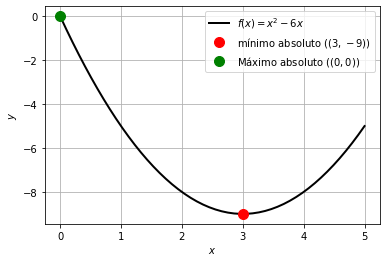

In [98]:
# graficar
plt.figure(figsize=(6,4))
plt.plot(x_num, f(x_num), 'k', lw=2, label = '$f(x)=x^2 - 6x$')
plt.plot(p_crit[0], f(p_crit[0]), 'ro', ms=10,label = f'mínimo absoluto $({p_crit[0],f(p_crit[0])})$')
plt.plot(0, f(0), 'go', ms=10,label = f'Máximo absoluto $({0,f(0)})$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### Actividad
Determinar los valores extremos absolutos de $h(x)=x^3-3x$ en $\left[-2.2,1.8\right]$, usando `sympy`. Mostrar en una gráfica.

In [99]:
sym.var('x')

x

In [100]:
def h(x):
    return x**3-3*x

In [101]:
h(x)

 3      
x  - 3⋅x

In [102]:
dh = sym.diff(h(x),x)
dh

   2    
3⋅x  - 3

In [103]:
p_crit = sym.solve(dh,x)
p_crit

[-1, 1]

In [104]:
p_crit[0]

-1

In [105]:
p_crit[1]

1

In [106]:
h(p_crit[0]),h(p_crit[1]),h(-2.2), h(1.8)

(2, -2, -4.048000000000003, 0.4320000000000004)

In [107]:
x_num = np.linspace(-2.2,1.8)
x_num

array([-2.2       , -2.11836735, -2.03673469, -1.95510204, -1.87346939,
       -1.79183673, -1.71020408, -1.62857143, -1.54693878, -1.46530612,
       -1.38367347, -1.30204082, -1.22040816, -1.13877551, -1.05714286,
       -0.9755102 , -0.89387755, -0.8122449 , -0.73061224, -0.64897959,
       -0.56734694, -0.48571429, -0.40408163, -0.32244898, -0.24081633,
       -0.15918367, -0.07755102,  0.00408163,  0.08571429,  0.16734694,
        0.24897959,  0.33061224,  0.4122449 ,  0.49387755,  0.5755102 ,
        0.65714286,  0.73877551,  0.82040816,  0.90204082,  0.98367347,
        1.06530612,  1.14693878,  1.22857143,  1.31020408,  1.39183673,
        1.47346939,  1.55510204,  1.63673469,  1.71836735,  1.8       ])

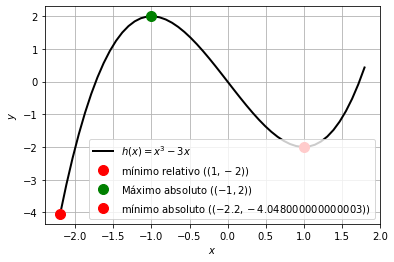

In [110]:
plt.figure(figsize=(6,4))
plt.plot(x_num, h(x_num), 'k', lw=2, label = '$h(x)=x^3 - 3x$')
plt.plot(p_crit[1], h(p_crit[1]), 'ro', ms=10,label = f'mínimo relativo $({p_crit[1], h(p_crit[1])})$')
plt.plot(p_crit[0], h(p_crit[0]), 'go', ms=10,label = f'Máximo absoluto $({p_crit[0], h(p_crit[0])})$')
plt.plot(-2.2, h(-2.2), 'ro', ms=10,label = f'mínimo absoluto $({-2.2, h(-2.2)})$')

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='best')
plt.grid()

### En varias variables...

El procedimiento es análogo. 

Si una función $f:\mathbb{R}^n\to\mathbb{R}$ alcanza un máximo o mínimo local en $\boldsymbol{x}=\boldsymbol{c}\in\mathbb{R}^n$, y $f$ es diferenciable en el punto $\boldsymbol{x}=\boldsymbol{c}$, entonces $\left.\frac{\partial f}{\partial \boldsymbol{x}}\right|_{\boldsymbol{x}=\boldsymbol{c}}=\boldsymbol{0}$ (todas las derivadas parciales en el punto $\boldsymbol{x}=\boldsymbol{c}$ son cero).

**Criterio de la segunda derivada:** para ver si es máximo o mínimo, se toma la segunda derivada (matriz jacobiana) y se verifica definición negativa o positiva, respectivamente.

Si se restringe a cierta región, hay ciertas técnicas. La más general, pero también la más compleja es la de **multiplicadores de Lagrange**.

**Ejemplo:** hacer a mano a la vez para corroborar...

In [111]:
sym.var('x y')

(x, y)

In [112]:
def f(x,y):
    return x**2 + y**2

In [113]:
f(x,y)

 2    2
x  + y 

In [114]:
dfx = sym.diff(f(x,y),x)
dfx

2⋅x

In [115]:
dfy = sym.diff(f(x,y),y)
dfy

2⋅y

In [116]:
xy_c = sym.solve([dfx, dfy], [x,y])
xy_c

{x: 0, y: 0}

In [117]:
x_c = xy_c[x]
y_c = xy_c[y]
x_c,y_c

(0, 0)

In [121]:
d2fx = sym.diff(f(x,y),x,2)
d2fy = sym.diff(f(x,y),y,2)
dfxy = sym.diff(f(x,y),x,y)

Jf = sym.Matrix([[d2fx, dfxy], [dfxy,d2fy]])
Jf

⎡2  0⎤
⎢    ⎥
⎣0  2⎦

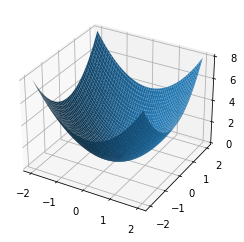

In [124]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

x_num = np.linspace(-2,2,100)
y_num = np.linspace(-2,2,100)
X, Y = np.meshgrid(x_num,y_num)

ax.plot_surface(X,Y,f(X,Y))
ax.plot([x_c], [y_c], [f(x_c,y_c)], '*r')

### Problema:
Se desea construir una lata cilíndrica de 250 $ml$ ¿Cuál es el radio de la base ($r$) y la altura del cilíndro ($h$) para minimizar la superficie?

1. Identificar qué se quiere minimizar (o maximizar):

    **Solución**
    
    Minimizar la superficie de un cilíndro ($S$).
    
    $$
    S=A_B+A_R,
    $$
    donde $A_B$ es el área de la base y $A_R$ es el área de la zona recta.
    $$
    A_B=\pi r^2,
    $$
    $$
    A_R=h \pi2r.
    $$
    
    Entonces $S=\pi r^2+h\pi2r$.
    
2. Incluir las restricciones:

    **Solución**
    
    El volumen ($V$) debe ser 250 $ml$=250 $cm^3$.
    
    $$
    V=\pi r^2h=250.
    $$
    
    Por lo que $h=\frac{250}{\pi r^2}$. Sustituyendo en $S$
    $$
    S=\pi r^2+\frac{250}{\pi r^2}\pi2r,
    $$
    simplificando, tenemos
    $$
    S=\pi r^2+\frac{500}{r}.
    $$

# Anuncios

## 1. [Curso gratis sugerido](https://www.kaggle.com/learn/python)
